The goal of this project is to take the publically available Beijing weather data from 2013 to 2017 and apply machine learning techniques to see if we can predict the amount of PM2.5 concentration in the air given other environmental features.

## Company Introduction

client for this project is an air purifier company.

   - One of the leading Global pollution controller organizations.
   - The company is working its way for the betterment of the society by using advanced technologies to purify the air by removing harmful particles from the atmosphere.


### Current Scenario

- As we know in recent years the pollution emitted per day has increased drastically, countries all around the world are taking up actions in order to tackle the rapid increase in pollution to avoid global warming.
- Beijing’s pollution authority has collected data for the past 5 years and the data has been passed on to your client by the government of China.
- The company calculates pollution using traditional or manual methods, so it needs a model to do the long process.

## Project Deliverables

- Machine Learning Task: **Regression**
- Target Variable: **PM2.5**
- Win Condition: **N/A (best possible model)**

### Project workflow


This project utilizes the Supervised Machine Learning algorithms from python’s Scikit-learn library. The model we hope to succeed in training is a regression model and below are the steps we will go through in this jupyter notebook for this project:

- Import the neccessary libraries and loading the data
- Data preprocessing
- Exploratory Data Ananlysis
- Model training and Evaluation
- Saving the model

## Data Description

The dataset is divided into two parts: Train, and Test sets.

### Train Set:
- The train set contains 403776 rows and 17 columns.
- The train set contains data from 2013-16.
- The column PM2.5 is the target variable.

### Test Set:
- The test set contains 16728 rows and 16 columns.
- The test set contains data for 2017.
- The test set doesn’t contain the PM2.5 column.
- PM2.5 needs to be predicted for the test set.


## Dataset Feature Descitpion
The Dataset contains the following columns:


|Column Name	| Description   |
|---------------|-------------- :|
|REF_NO	| Index of rows|
|year	| Contains the year in which the data was Recorded|
|month	| Contains the month of the year in which the data was Recorded|
|day	| Contains the day of the month in which the data was Recorded|
|hour	| Contains at what hour of the day the data was Recorded|
|**PM2.5**	| **Atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers**|
|PM10	| Atmospheric particulate matter (PM) that have a diameter less than 10 micrometers|
|SO2	| SO2 concentration (ug/m^3)|
|NO2	| NO2 concentration (ug/m^3)|
|CO	    | CO concentration (ug/m^3)|
|O3	    | Ozone concentration (ug/m^3)|
|Temp	| temperature (degree Celsius)|
|PRES	| pressure (hPa)|
|DEWP	| dew point temperature (degree Celsius)|
|RAIN	| RAIN in (mm)|
|wd	    |wind direction|
|WSPM	| wind speed (m/s)|
|station |	name of the air-quality monitoring site |

### Import required packages

In [1]:
import numpy as np                     
#import dtale                                       # Auto EDA library
#import sweetviz as sv                              # Auto EDA library
import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
#pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.max_columns', None)          # To display every column of the dataset in head()

from pandas_profiling import ProfileReport  #for auto EDA report

# For Random seed values
from random import randint

import warnings
warnings.filterwarnings('ignore')  

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

# Install and update plotly using this command to the latest version (higher than version 4.0.0)

#!pip install plotly --upgrade
import plotly.graph_objs as go

In [2]:
df_train = pd.read_csv('beijing_train.csv')
df_train.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [3]:
print('Train Data Shape', df_train.shape)

Train Data Shape (403776, 18)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    395301 non-null  float64
 6   PM10     397554 non-null  float64
 7   SO2      395000 non-null  float64
 8   NO2      391917 non-null  float64
 9   CO       383515 non-null  float64
 10  O3       390769 non-null  float64
 11  TEMP     403512 non-null  float64
 12  PRES     403511 non-null  float64
 13  DEWP     403507 non-null  float64
 14  RAIN     403515 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403538 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


In [19]:
df_train.describe()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,395301.000000,397554.000000,395000.000000,391917.000000,383515.000000,390769.000000,403512.000000,403511.000000,403507.000000,403515.000000,403538.000000
mean,16824.500000,2014.564194,6.735378,15.748217,11.500000,79.248275,104.327897,15.733060,50.352785,1214.843339,58.119327,14.088899,1010.282534,3.157291,0.067052,1.718380
std,9713.352953,1.097503,3.356479,8.808891,6.922195,79.146708,90.136400,21.739455,34.771910,1124.285676,57.375966,11.303534,10.356778,13.617273,0.837845,1.237965
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8412.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,2.000000,23.000000,500.000000,11.000000,4.000000,1002.000000,-8.000000,0.000000,0.900000
50%,16824.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,83.000000,7.000000,43.000000,900.000000,45.000000,15.400000,1009.800000,4.200000,0.000000,1.400000
75%,25236.250000,2016.000000,10.000000,23.000000,17.250000,110.000000,145.000000,19.000000,71.000000,1500.000000,83.000000,23.500000,1018.300000,15.500000,0.000000,2.200000
max,33648.000000,2016.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000




```info``` function gives us the following insights into the df_menu dataframe:

  - There are a total of **403776 samples (rows)** and **18 columns** in the dataframe.
  
  - There are **5 columns** with a **numeric** datatype and **2 column** with an **object** datatype & **11 columns** with an **float** datatype
  
  - There are **few missing** values in the data.

In [5]:
# duplicated and null values
print('Are there any duplicated values in our data ? : {}\n'.format(df_train.duplicated().any()))
print('The total number of null values in each colum:')
display(df_train.isnull().sum())

Are there any duplicated values in our data ? : False

The total number of null values in each colum:


REF_NO         0
year           0
month          0
day            0
hour           0
PM2.5       8475
PM10        6222
SO2         8776
NO2        11859
CO         20261
O3         13007
TEMP         264
PRES         265
DEWP         269
RAIN         261
wd          1389
WSPM         238
station        0
dtype: int64

In [6]:
columns = df_train.columns

In [7]:
#df_train['wd'].isnull().sum()/df_train['wd'].sum()
df_train['wd'].count()

402387

In [8]:
columns

Index(['REF_NO', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

 calculate the missing values % in each feature 

In [9]:
for i in columns:
    if df_train[i].isnull().sum()>0:
        print("data type of feature {} is : {} ".format(i,df_train[i].dtype))
        print('Missing values Percentage : {}'.format(df_train[i].isnull().sum()/df_train[i].count()*100))
        print('******************************************************************')

data type of feature PM2.5 is : float64 
Missing values Percentage : 2.143935886830542
******************************************************************
data type of feature PM10 is : float64 
Missing values Percentage : 1.565070405529815
******************************************************************
data type of feature SO2 is : float64 
Missing values Percentage : 2.221772151898734
******************************************************************
data type of feature NO2 is : float64 
Missing values Percentage : 3.0258957891594394
******************************************************************
data type of feature CO is : float64 
Missing values Percentage : 5.282974590302857
******************************************************************
data type of feature O3 is : float64 
Missing values Percentage : 3.328564957813952
******************************************************************
data type of feature TEMP is : float64 
Missing values Percentage : 0.0654255635520133

### treating missing values with mode

In [57]:
# fill in the missing values with the mean of the particular column
df_train.fillna(value=df_train.mean(),inplace=True)
# replace the missing values for the wind direction with the modal value
df_train.wd.fillna(value='NE',inplace=True)
# let's check the data again if there are any missing values
df_train.isnull().any()

REF_NO     False
year       False
month      False
day        False
hour       False
PM2.5      False
PM10       False
SO2        False
NO2        False
CO         False
O3         False
TEMP       False
PRES       False
DEWP       False
RAIN       False
wd         False
WSPM       False
station    False
dtype: bool

In [10]:
df_train.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


<Figure size 1296x864 with 0 Axes>

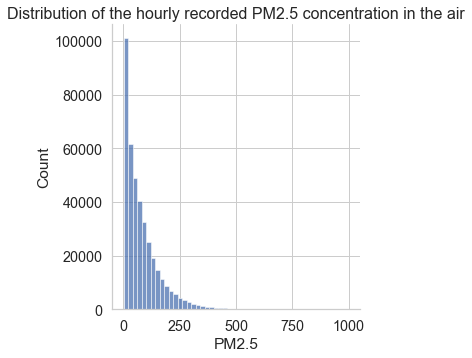

In [18]:
plt.figure(figsize=(18,12))
sns.displot(df_train['PM2.5'],bins=50)
plt.title('Distribution of the hourly recorded PM2.5 concentration in the air', fontsize=16)
plt.show()

### In which month does the amount of PM2.5 contained in the air rises ?

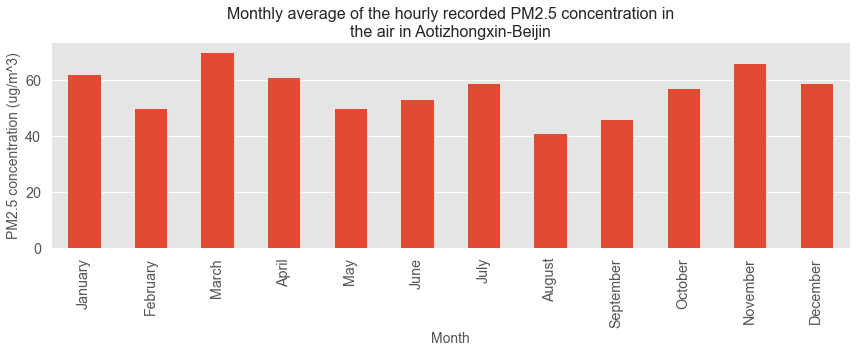

In [23]:
monthly_data = df_train[['month','PM2.5']]
months = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']
ordered_monthdf = pd.DataFrame(months,columns=['month'])
map_dict = {}
for i,j in enumerate(months):
    map_dict.setdefault(i+1,j)

monthly_data.month = monthly_data.month.map(map_dict)
monthly_average = monthly_data.groupby('month').median()
monthly_average = pd.merge(ordered_monthdf,monthly_average,left_on='month',right_index=True)
monthly_average = np.round(monthly_average,1)
monthly_average = monthly_average.set_index('month')

# plot the data
with plt.style.context('ggplot'):
    monthly_average.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Monthly average of the hourly recorded PM2.5 concentration in\nthe air in Aotizhongxin-Beijin',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

### At what time of the day do we expect the amount of PM2.5 concentration in the air to be high ?

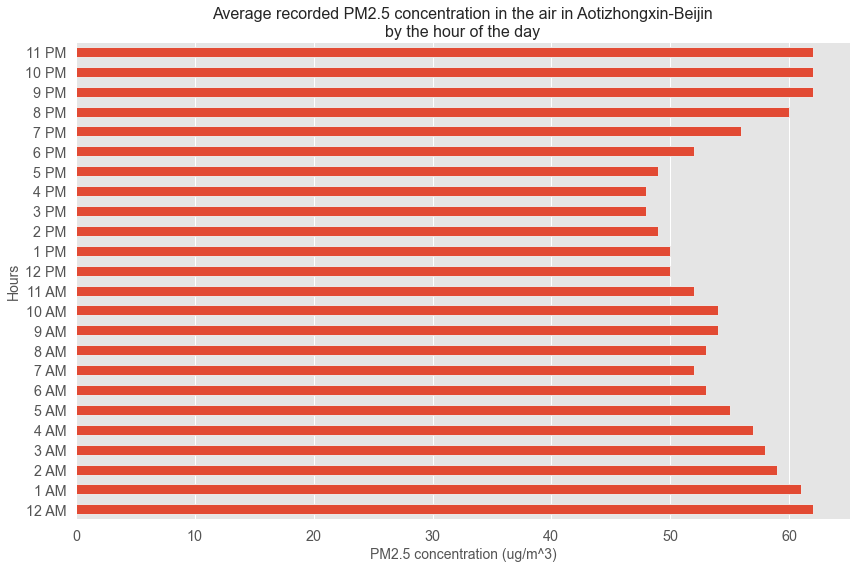

In [24]:
hourly_data = df_train[['hour','PM2.5']]
hrs = ['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM','7 AM','8 AM','9 AM','10 AM',
      '11 AM','12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM','7 PM',
      '8 PM','9 PM','10 PM','11 PM']
hour_dict = {}
for i,j in enumerate(hrs):
    hour_dict.setdefault(i,j)
    
hourly_data = hourly_data.groupby('hour').median().reset_index()
hourly_data.hour = hourly_data.hour.map(hour_dict)
hourly_data = hourly_data.set_index('hour')

# plot the data
with plt.style.context('ggplot'):
    hourly_data.plot(figsize=(12,8),legend=False,kind='barh',linewidth=.9)
    plt.ylabel('Hours',fontsize=14)
    plt.xlabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Average recorded PM2.5 concentration in the air in Aotizhongxin-Beijin\nby the hour of the day',fontsize=16)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

### In which direction does polluted air/wind mostly move ?

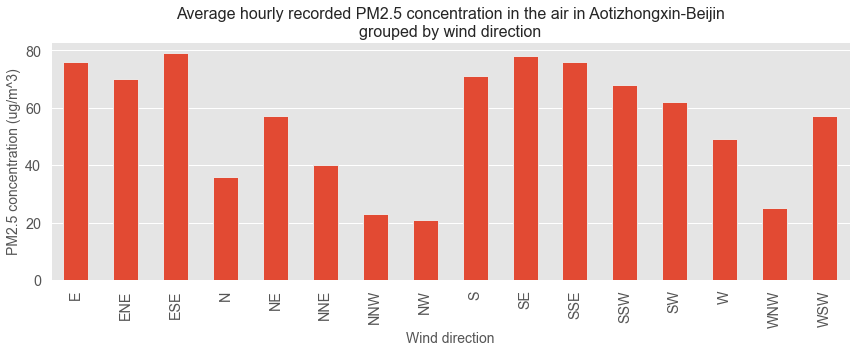

In [25]:
wind_dir = df_train[['wd','PM2.5']]
wind_dir = wind_dir.groupby('wd').median()

# plot the data
with plt.style.context('ggplot'):
    wind_dir.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Wind direction',fontsize=14)
    plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Average hourly recorded PM2.5 concentration in the air in Aotizhongxin-Beijin\ngrouped by wind direction',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

### How do the other environmental factors affect the amount of PM2.5 concentration in the air ?

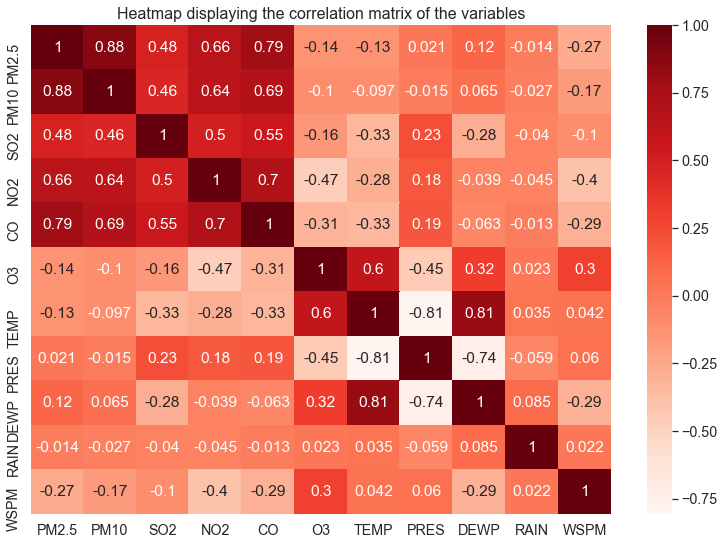

In [27]:
# let's try and visualize the relationships between the features of the data
plt.figure(figsize=(13,9))
correlation_data = df_train[['PM2.5', 'PM10', 'SO2', 'NO2',
                         'CO', 'O3', 'TEMP', 'PRES',
                         'DEWP', 'RAIN', 'WSPM']]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

## Model Training and Evaluation

### check for multicollinearity among variables and fit a regression model using statsmodels